In [4]:
# 1)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


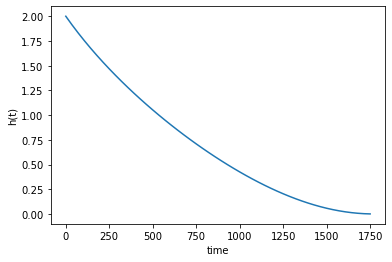

The time should be 1535.7142857142858 s, when the height is 5cm


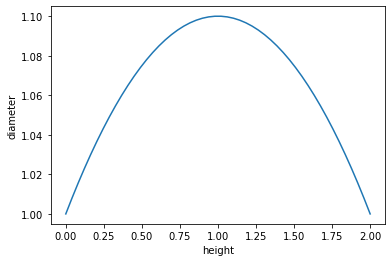

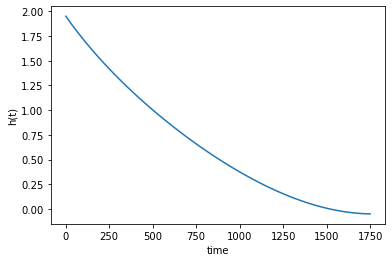

[3.35991938340544, 4.62196632677083]
[5375.87101344871, 7395.14612283333]


/Users/carolyn/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/carolyn/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/carolyn/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/carolyn/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextoo

In [5]:

# function that returns dh/dt
def model(h,t):
  g = 9.81
  d = 0.02
  D = 1+0.2*h-0.1*h*h
  dhdt = -math.sqrt(2*g)*(pow(d,2)/pow(D,2))*math.sqrt(h)
  return dhdt

# initial condition
h0 = 2

# time points
t = np.linspace(0,1750)

# solve ODE
h = odeint(model,h0,t)

# plot results
plt.plot(t,h)
plt.xlabel('time')
plt.ylabel('h(t)')
plt.show()

def hh():
  for i in range(len(h)):
    if abs(h[i] - 0.05) < 0.007:
      print("The time should be", end =" ")
      print(t[i], end =" ")
      print("s, when the height is 5cm")

hh()

# 2)
from scipy import optimize
import math

def t(h):
  g = 9.81
  d = 0.02
  h0 = 2
  D = 1+0.2*h-0.1*h*h
  return (math.sqrt(h) - math.sqrt(h0))/(-math.sqrt(g/2)*(pow(d,2)/pow(D,2)))

root=optimize.brentq(t, 0, 3)
root

# D(h) = a+b*h+c*h*h
# D(0) = 1
# D(1) = 1.1
# D(2) = 1

import sympy as sym
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# 3)
def Diameter(h):
  sym.init_printing()
  a,b,c = sym.symbols('a,b,c')
  f = sym.Eq(a,1)
  g = sym.Eq(a+b*1+c*1*1,1.1)
  j = sym.Eq(a+b*2+c*2*2,1)

  res = sym.solve([f,g,j],(a,b,c))
  a = res[a]
  b = res[b]
  c = res[c]
  return a+b*h+c*h*h

# initial condition
h0 = 2
h = np.linspace(0,h0)
D = Diameter(h)
plt.plot(h,D)
plt.xlabel('height')
plt.ylabel('diameter')
plt.show()

def rate(t,h):
  g = 9.81
  d = 0.02
  D = 1+0.2*h-0.1*h*h
  dhdt = -math.sqrt(2*g)*(pow(d,2)/pow(D,2))*math.sqrt(h)
  return dhdt

def height_diff(t):
  # solve ODE
  h = odeint(rate,h0,t,tfirst=True)
  return h-0.05

def tanalytic(D,h):
  g = 9.81
  d = 0.02
  h0 = 2
  t = sym.symbols('t')
  equation = sym.Eq(h, pow(-math.sqrt(g/2)*(pow(d,2)/pow(D,2))*t+math.sqrt(h0),2))
  t0 = sym.solve(equation)  
  print(t0) 

# time points
t = np.linspace(0,1750)
h=height_diff(t)
# plot results
plt.figure()
plt.plot(t,h)
plt.xlabel('time')
plt.ylabel('h(t)')
plt.show()

# 4)
time1 = tanalytic(0.05,0.05)
time2 = tanalytic(2,0.05)

from scipy import optimize
def t(h):
  g = 9.81
  d = 0.02
  h0 = 2
  D = 1+0.2*h-0.1*h*h
  return (math.sqrt(h) - math.sqrt(h0))/(-math.sqrt(g/2)*(pow(d,2)/pow(D,2)))

root=optimize.brentq(t, 0, 3)
root